In [1]:
import numpy as np
import math

def getnklist(A, B, p, q):
    out_list = []
    
    if p == 1:
        q -= 1
    elif q == 1:
        p -= 1

    N = 1
    while (True):
        eq1l = p + (N-1)*(p + q + math.ceil(np.log2(N)))
        if(eq1l > A):
            break

        eq2r = (B - q)/(p + q + math.ceil(np.log2(N)))
        K = int(eq2r) + 1

        if(N<=K):
            out_list.append((N, K))

        N += 1

    K = 1
    while (True):
        eq2l = q + (K-1)*(p + q + math.ceil(np.log2(K)))
        if(eq2l > B):
            break

        eq1r = (A - p)/(p + q + math.ceil(np.log2(K)))
        N = int(eq1r) + 1

        if(K<=N):
            out_list.append((N, K))

        K += 1

    return out_list

In [2]:
A = 32
B = 32

for p in range(1, 9):
    for q in range(1, 9):

        out_list = getnklist(A, B, p, q)

        print("Bitwidth p : ", p)
        print("Bitwidth q : ", q)
        print("(N, K) Tuplets : ", out_list)
        mult_list = []
        for ele in out_list:
            mult_list.append(ele[0]*ele[1] + (ele[0]-1)*(ele[1]-1))
        print("NxK Values : ", mult_list)

Bitwidth p :  1
Bitwidth q :  1
(N, K) Tuplets :  [(1, 33), (2, 17), (3, 11), (4, 11), (5, 9), (6, 9), (7, 9), (8, 9), (32, 1), (16, 2), (11, 3), (11, 4), (8, 5), (8, 6), (8, 7), (8, 8)]
NxK Values :  [33, 50, 53, 74, 77, 94, 111, 128, 32, 47, 53, 74, 68, 83, 98, 113]
Bitwidth p :  1
Bitwidth q :  2
(N, K) Tuplets :  [(1, 16), (2, 11), (3, 8), (4, 8), (5, 7), (6, 7), (7, 7), (16, 1), (11, 2), (8, 3), (8, 4), (7, 5), (7, 6), (7, 7)]
NxK Values :  [16, 32, 38, 53, 59, 72, 85, 16, 32, 38, 53, 59, 72, 85]
Bitwidth p :  1
Bitwidth q :  3
(N, K) Tuplets :  [(1, 11), (2, 8), (3, 7), (4, 7), (5, 6), (6, 6), (11, 1), (8, 2), (7, 3), (7, 4), (6, 5), (6, 6)]
NxK Values :  [11, 23, 33, 46, 50, 61, 11, 23, 33, 46, 50, 61]
Bitwidth p :  1
Bitwidth q :  4
(N, K) Tuplets :  [(1, 8), (2, 6), (3, 5), (4, 5), (5, 5), (8, 1), (7, 2), (6, 3), (6, 4), (5, 5)]
NxK Values :  [8, 17, 23, 32, 41, 8, 20, 28, 39, 41]
Bitwidth p :  1
Bitwidth q :  5
(N, K) Tuplets :  [(1, 6), (2, 5), (3, 5), (4, 5), (7, 1), (6, 2)

[[1, 1, 36], [1, 2, 28], [1, 3, 24], [1, 4, 15], [1, 5, 12], [1, 6, 8], [1, 7, 8], [1, 8, 6], [2, 1, 28], [2, 2, 15], [2, 3, 12], [2, 4, 8], [2, 5, 8], [2, 6, 6], [2, 7, 6], [2, 8, 3], [3, 1, 24], [3, 2, 12], [3, 3, 8], [3, 4, 8], [3, 5, 6], [3, 6, 6], [3, 7, 6], [3, 8, 3], [4, 1, 15], [4, 2, 9], [4, 3, 6], [4, 4, 6], [4, 5, 6], [4, 6, 6], [4, 7, 3], [4, 8, 2], [5, 1, 12], [5, 2, 6], [5, 3, 6], [5, 4, 6], [5, 5, 6], [5, 6, 4], [5, 7, 2], [5, 8, 2], [6, 1, 9], [6, 2, 6], [6, 3, 6], [6, 4, 4], [6, 5, 4], [6, 6, 2], [6, 7, 2], [6, 8, 2], [7, 1, 6], [7, 2, 6], [7, 3, 4], [7, 4, 4], [7, 5, 4], [7, 6, 2], [7, 7, 2], [7, 8, 2], [8, 1, 6], [8, 2, 4], [8, 3, 4], [8, 4, 4], [8, 5, 2], [8, 6, 2], [8, 7, 2], [8, 8, 2]]


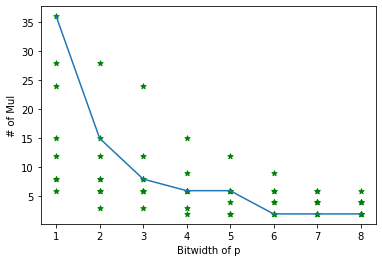

In [3]:
import matplotlib.pyplot as plt

A = 27
B = 18
bit2mul = []

for p in range(1, 9):
    for q in range(1, 9):
#         bitwidth = np.
        out_list = getnklist(A, B, p, q)

#         print("Bitwidth p : ", p)
#         print("Bitwidth q : ", q)
#         print("(N, K) Tuplets : ", out_list)
        mult_list = []
        for ele in out_list:
            mult_list.append(ele[0]*ele[1])
#         print("NxK Values : ", mult_list)
        bit2mul.append([p,q, max(mult_list)])
#         print("Max NxK Value:", max(mult_list))

print(bit2mul)  
x = []
y = []
z = []
peqq_p = []
peqq_mul = []
for i in range(0, len(bit2mul)):
    x.append(bit2mul[i][0])
#     y.append(bit2mul[i][1])
    z.append(bit2mul[i][2])
    if bit2mul[i][1] == bit2mul[i][0]:
        peqq_p.append(bit2mul[i][0])
        peqq_mul.append(bit2mul[i][2])

# naming the x-axis
plt.xlabel('Bitwidth of p')
# naming the y-axis
plt.ylabel('# of Mul')
# plot title
# plt.title('Achievable concurrent multiplication')        
plt.scatter(x, z, color= "green", marker= "*", s=30)
plt.plot(peqq_p, peqq_mul, label = "p=q")
plt.show()

[[1, 1, 36], [1, 2, 28], [1, 3, 24], [1, 4, 15], [1, 5, 12], [1, 6, 8], [1, 7, 8], [1, 8, 6], [2, 1, 28], [2, 2, 15], [2, 3, 12], [2, 4, 8], [2, 5, 8], [2, 6, 6], [2, 7, 6], [2, 8, 3], [3, 1, 24], [3, 2, 12], [3, 3, 8], [3, 4, 8], [3, 5, 6], [3, 6, 6], [3, 7, 6], [3, 8, 3], [4, 1, 15], [4, 2, 9], [4, 3, 6], [4, 4, 6], [4, 5, 6], [4, 6, 6], [4, 7, 3], [4, 8, 2], [5, 1, 12], [5, 2, 6], [5, 3, 6], [5, 4, 6], [5, 5, 6], [5, 6, 4], [5, 7, 2], [5, 8, 2], [6, 1, 9], [6, 2, 6], [6, 3, 6], [6, 4, 4], [6, 5, 4], [6, 6, 2], [6, 7, 2], [6, 8, 2], [7, 1, 6], [7, 2, 6], [7, 3, 4], [7, 4, 4], [7, 5, 4], [7, 6, 2], [7, 7, 2], [7, 8, 2], [8, 1, 6], [8, 2, 4], [8, 3, 4], [8, 4, 4], [8, 5, 2], [8, 6, 2], [8, 7, 2], [8, 8, 2]]


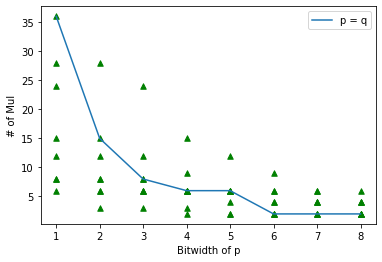

In [4]:
import matplotlib.pyplot as plt

A = 27
B = 18
bit2mul = []

for p in range(1, 9):
    for q in range(1, 9):
#         bitwidth = np.
        out_list = getnklist(A, B, p, q)

#         print("Bitwidth p : ", p)
#         print("Bitwidth q : ", q)
#         print("(N, K) Tuplets : ", out_list)
        mult_list = []
        for ele in out_list:
            mult_list.append(ele[0]*ele[1])
#         print("NxK Values : ", mult_list)
        bit2mul.append([p,q, max(mult_list)])
#         print("Max NxK Value:", max(mult_list))

print(bit2mul)  
x = []
y = []
z = []
peqq_p = []
peqq_mul = []
for i in range(0, len(bit2mul)):
    x.append(bit2mul[i][0])
#     y.append(bit2mul[i][1])
    z.append(bit2mul[i][2])
    if bit2mul[i][1] == bit2mul[i][0]:
        peqq_p.append(bit2mul[i][0])
        peqq_mul.append(bit2mul[i][2])

# naming the x-axis
plt.xlabel('Bitwidth of p')
# naming the y-axis
plt.ylabel('# of Mul')
# plot title
# plt.title('Achievable concurrent multiplication')        
plt.scatter(x, z, label = "", color= "green", marker= "^", s=30)
plt.plot(peqq_p, peqq_mul, label = "p = q")
plt.legend()
plt.show()

[[60. 46. 39. 23. 18. 11. 11.  8.]
 [46. 23. 18. 11. 11.  8.  8.  3.]
 [39. 18. 11. 11.  8.  8.  8.  3.]
 [23. 13.  8.  8.  8.  8.  3.  2.]
 [18.  8.  8.  8.  8.  5.  2.  2.]
 [13.  8.  8.  5.  5.  2.  2.  2.]
 [ 8.  8.  5.  5.  5.  2.  2.  2.]
 [ 8.  5.  5.  5.  2.  2.  2.  2.]]
[[128.  85.  61.  41.  32.  25.  18.  18.]
 [ 85.  41.  32.  25.  25.  18.  13.  13.]
 [ 61.  32.  25.  25.  13.  13.  13.   8.]
 [ 41.  25.  25.  13.  13.  13.   8.   8.]
 [ 32.  25.  13.  13.  13.  13.   8.   5.]
 [ 25.  18.  13.  13.  13.   8.   5.   5.]
 [ 18.  13.  13.   8.   8.   5.   5.   5.]
 [ 18.  13.   8.   8.   5.   5.   5.   5.]]
[60.0, 23.0, 11.0, 8.0, 8.0, 2.0, 2.0, 2.0]
[128.0, 41.0, 25.0, 13.0, 13.0, 8.0, 5.0, 5.0]


<IPython.core.display.Javascript object>


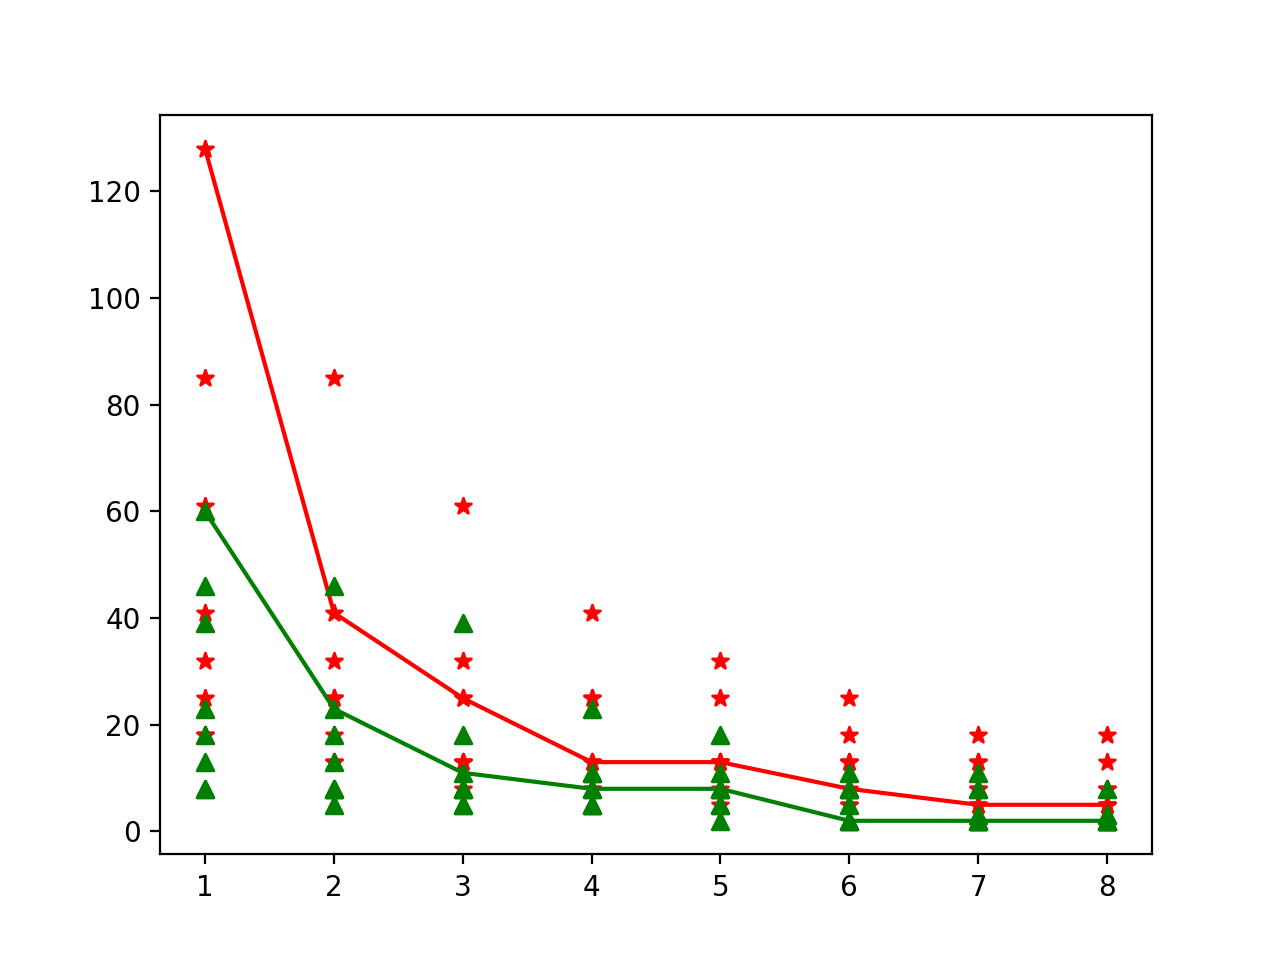

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A = 27
B = 18
bit2mul_27 = np.zeros((8, 8))
bit2mul_32 = np.zeros((8, 8))

for p in range(1, 9):
    for q in range(1, 9):
#         bitwidth = np.
        out_list_27 = getnklist(27, 18, p, q)
        out_list_32 = getnklist(32, 32, p, q)

        mult_list_27 = []
        mult_list_32 = []
        for ele in out_list_27:
            mult_list_27.append(ele[0]*ele[1] + (ele[0]-1)*(ele[1]-1))
        for ele in out_list_32:
            mult_list_32.append(ele[0]*ele[1] + (ele[0]-1)*(ele[1]-1))
        bit2mul_27[p-1][q-1] = max(mult_list_27)
        bit2mul_32[p-1][q-1] = max(mult_list_32)

print(bit2mul_27)
print(bit2mul_32)

peqq_mul_27 = []
peqq_mul_32 = []
for i in range(8):
    peqq_mul_27.append(bit2mul_27[i][i])
    peqq_mul_32.append(bit2mul_32[i][i])
print(peqq_mul_27)
print(peqq_mul_32)

fig, ax = plt.subplots()
x_ticks = np.arange(1, 9, 1)
for p in range(8):
    ax.scatter(x_ticks, bit2mul_27[p], marker= "^", color = 'green', zorder=10)
    ax.scatter(x_ticks, bit2mul_32[p], marker= "*", color = 'red', zorder=1)

ax.plot(x_ticks, peqq_mul_27, color = 'green')
ax.plot(x_ticks, peqq_mul_32, color = 'red')
plt.show()

<IPython.core.display.Javascript object>


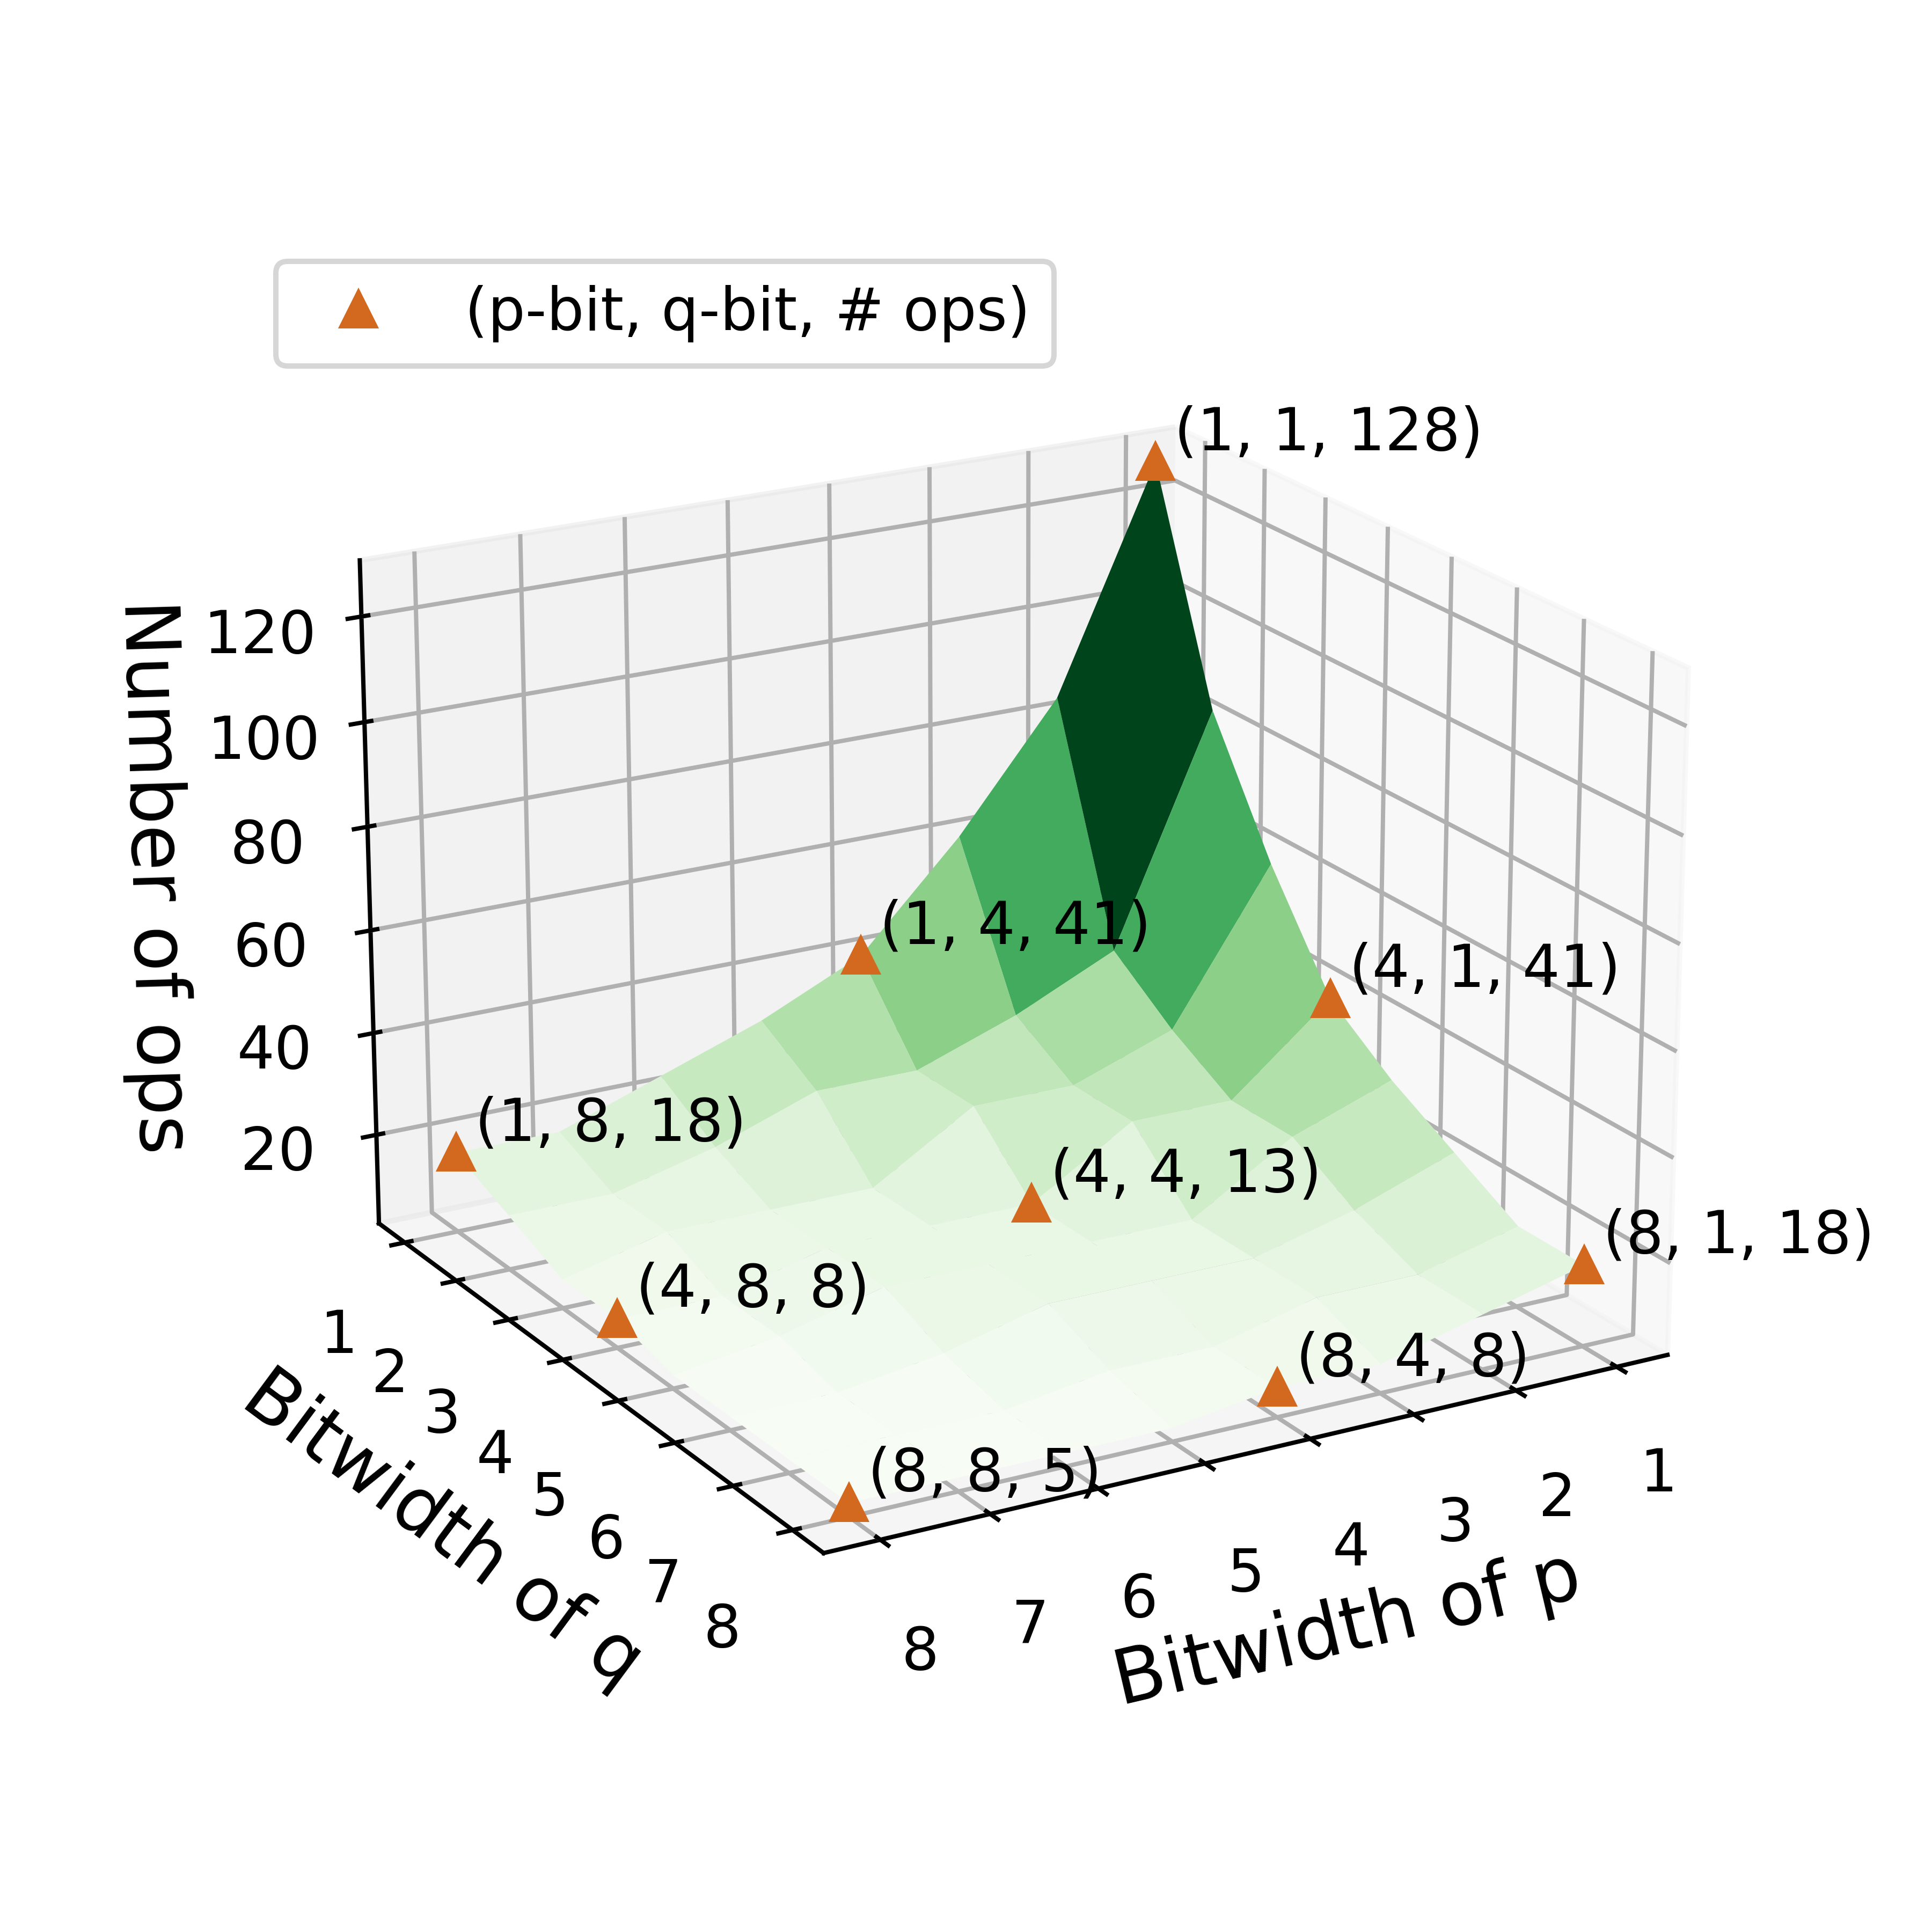

In [6]:
fig = plt.figure(figsize=(5, 5), dpi=360)
# fig = plt.figure()
ax = fig.add_subplot(projection='3d')

fs = 14
fs2 = 11
# naming the x-axis
ax.set_xlabel('Bitwidth of p', fontsize=fs)
ax.set_ylabel('Bitwidth of q', fontsize=fs)
# naming the y-axis
ax.set_zlabel('Number of ops', fontsize=fs)
ax.tick_params(labelsize=fs2)
x_mesh, y_mesh = np.meshgrid(np.arange(1, 9, 1), np.arange(1, 9, 1))
z_mesh_27 = np.zeros((8, 8))
z_mesh_32 = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        z_mesh_32[i][j] = bit2mul_32[i][j]
ax.plot_surface(x_mesh, y_mesh, z_mesh_32, cmap='Greens', zorder=1)
# ax.scatter(np.arange(1, 9, 1), np.arange(1, 9, 1), peqq_mul_32, marker= "*", label = "A = 32, B = 32", zorder=2000)

for i in [0, 3, 7]: #plot each point + it's index as text above
    for j in [0, 3, 7]:
        ax.plot(j+1,i+1,bit2mul_32[i][j], '^', color='chocolate', zorder=200) 
        ax.text(j+1,i+1,bit2mul_32[i][j],  ' (%d, %d, %d) ' %(i+1, j+1, int(bit2mul_32[i][j])), verticalalignment='bottom', horizontalalignment='left', size=fs2, zorder=100,color='k') 
leg = ax.legend(['(p-bit, q-bit, # ops)'], fontsize=fs2, loc='upper left')
ax.view_init(elev= 20, azim = 60)
# for t in leg.get_texts():
#     t.set_va('center')
# leg.set_frame_on(False)
# for t in leg.get_texts():
#     t.set_y(-20)
plt.show()

<IPython.core.display.Javascript object>


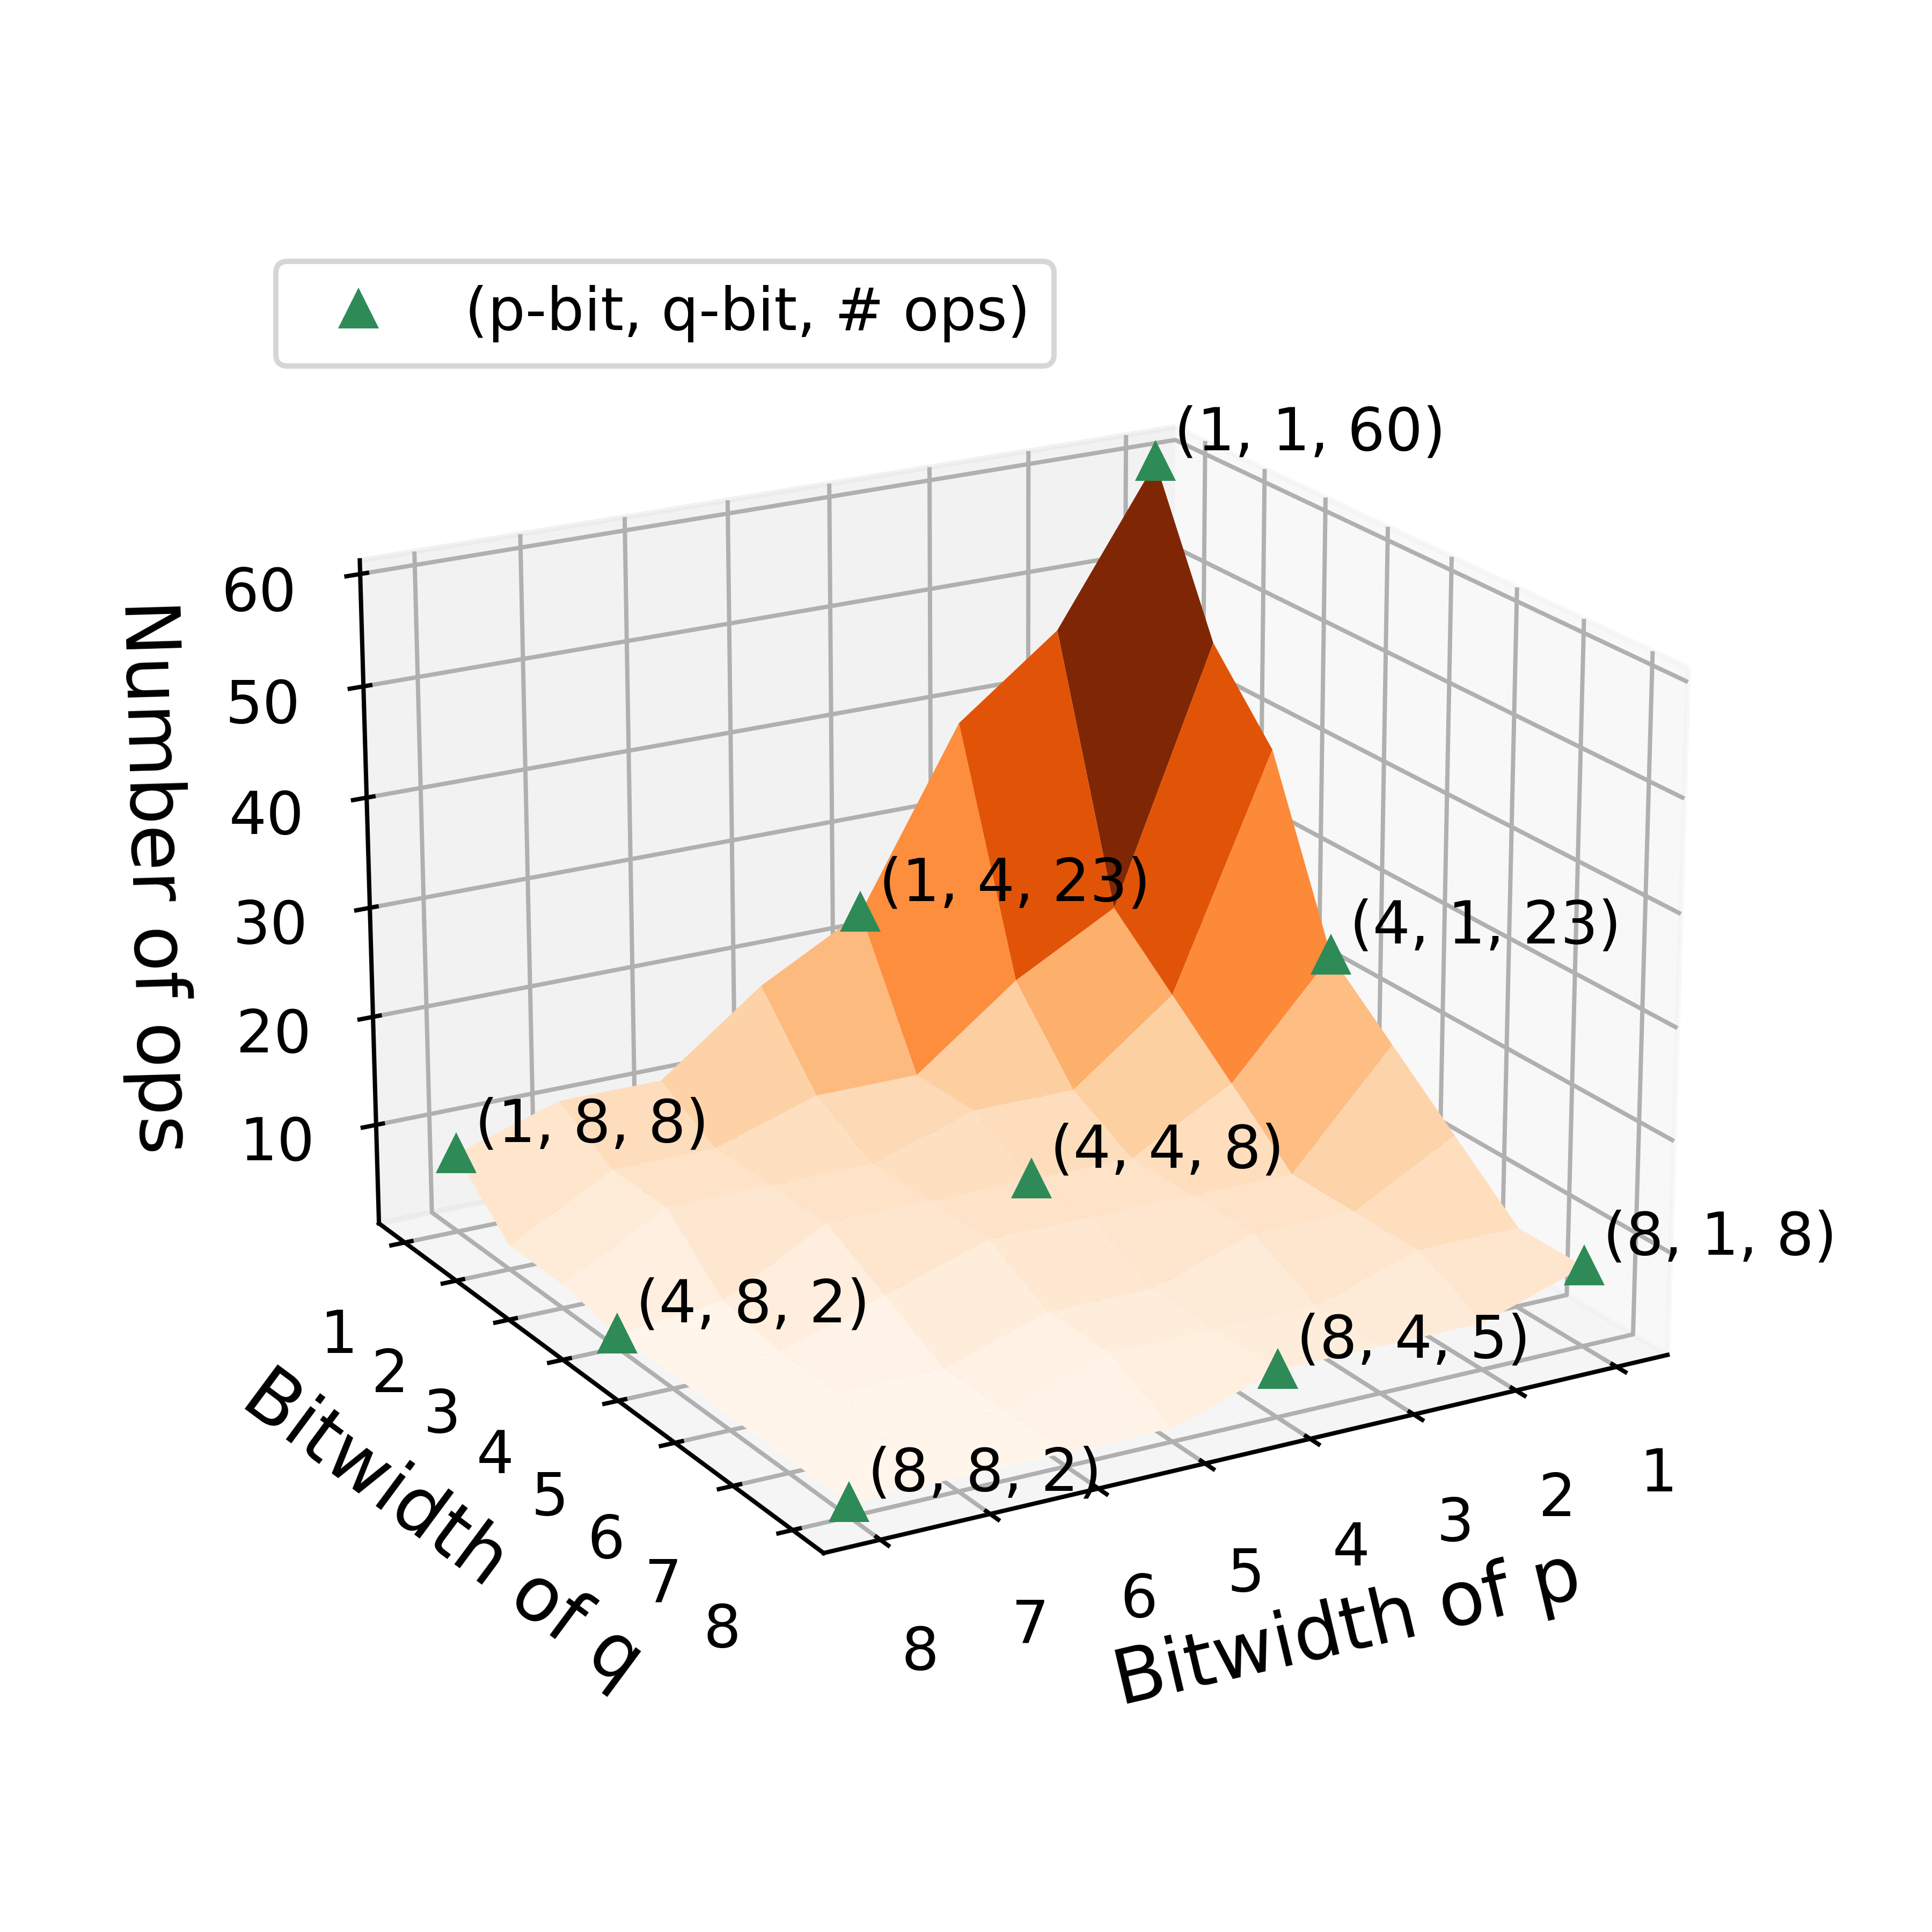

In [7]:
fig = plt.figure(figsize=(5, 5), dpi=360)
# fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fs = 14
fs2 = 11
# naming the x-axis
ax.set_xlabel('Bitwidth of p', fontsize=fs)
ax.set_ylabel('Bitwidth of q', fontsize=fs)
# naming the y-axis
ax.set_zlabel('Number of ops', fontsize=fs)
ax.tick_params(labelsize=fs2)

x_mesh, y_mesh = np.meshgrid(np.arange(1, 9, 1), np.arange(1, 9, 1))
z_mesh_27 = np.zeros((8, 8))
z_mesh_32 = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        z_mesh_27[i][j] = bit2mul_27[i][j]
ax.plot_surface(x_mesh, y_mesh, z_mesh_27, cmap='Oranges', zorder=1)
# ax.scatter(np.arange(1, 9, 1), np.arange(1, 9, 1), peqq_mul_32, marker= "*", label = "A = 32, B = 32", zorder=2000)

for i in [0, 3, 7]: #plot each point + it's index as text above
    for j in [0, 3, 7]:
        ax.plot(j+1,i+1,z_mesh_27[i][j], '^', color='seagreen', zorder=200) 
        ax.text(j+1,i+1,z_mesh_27[i][j],  ' (%d, %d, %d) ' %(i+1, j+1, int(bit2mul_27[i][j])), horizontalalignment='left', verticalalignment='bottom', size=fs2, zorder=100,color='k') 
leg = ax.legend(['(p-bit, q-bit, # ops)'], fontsize=fs2, loc='upper left')
ax.view_init(elev= 20, azim = 60)
# leg.set_frame_on(False)
# for t in leg.get_texts():
#     t.set_y(-20)
plt.show()

In [8]:
print(z_mesh_27)

[[60. 46. 39. 23. 18. 11. 11.  8.]
 [46. 23. 18. 11. 11.  8.  8.  3.]
 [39. 18. 11. 11.  8.  8.  8.  3.]
 [23. 13.  8.  8.  8.  8.  3.  2.]
 [18.  8.  8.  8.  8.  5.  2.  2.]
 [13.  8.  8.  5.  5.  2.  2.  2.]
 [ 8.  8.  5.  5.  5.  2.  2.  2.]
 [ 8.  5.  5.  5.  2.  2.  2.  2.]]
